<a href="https://colab.research.google.com/github/shellgav/Analisis_de_ventas_supermercado/blob/main/Proyecto_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ÁNALISIS DE VENTAS HISTÓRICAS*** 📈

***Proyecto Final del Módulo N°2 - Ciencias de Datos - Equipo N°1 Cohorte 15*** \\
Por: \\
***Aarón Mateo Tocora Jiménez*** \\
***Shelly Mayra Alejandra Gaviria Botina*** \\
**Felipe Andres Mejía Carrillo** \\
***Joel Valencia***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### INFORME EXPLORATORIO ###

# Instalar ydata-profiling
!pip install ydata-profiling -q

# Importar las librerías
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Leer el archivo csv
df = pd.read_csv("/content/drive/MyDrive/Bases_data/Copy of Features data set.csv")

# Mostrar información básica del DataFrame
print(df)
df.info()

# Generar el informe de perfil
report = ProfileReport(df, sort=None, html={'style': {'full_width': True}})
report

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.9 MB/s eta 0:00:00
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05     

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [ ]:
# Leer archivos csv's
features= pd.read_csv("/content/drive/MyDrive/Features data set (1).csv")
sales = pd.read_csv("/content/drive/MyDrive/sales data-set.csv")
stores = pd.read_csv("/content/drive/MyDrive/stores data-set.csv")

***INFORMACIÓN DE DATAFRAMES***

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8146 entries, 0 to 8145
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8146 non-null   int64  
 1   Date          8146 non-null   object 
 2   Temperature   8146 non-null   float64
 3   Fuel_Price    8146 non-null   float64
 4   MarkDown1     3989 non-null   float64
 5   MarkDown2     2880 non-null   float64
 6   MarkDown3     3574 non-null   float64
 7   MarkDown4     3424 non-null   float64
 8   MarkDown5     4006 non-null   float64
 9   CPI           7562 non-null   float64
 10  Unemployment  7562 non-null   float64
 11  IsHoliday     8146 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 708.1+ KB


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


***LIMPIEZA DE DATOS***

In [ ]:
# DataFrame "Sales"
# Modificación del formato de la variable "Date" como corresponde
sales['Date']=pd.to_datetime(sales['Date'], format='%d/%m/%Y') # DataFrame "Sales"
sales['Date'] = pd.to_datetime(sales['Date'])

# DataFrame "Features"
features['Date']=pd.to_datetime(sales['Date'], format='%d/%m/%Y')  # DataFrame "Features"
features['Date'] = pd.to_datetime(sales['Date'])

# Asignación del número de semana correspondiente a cada fecha en el DataFrame "Features"
features['Week'] = (features['Date'] - features['Date'].min()).dt.days // 7 + 1
#features.head()

# Eliminar todos los registros con fecha posterior al "2012-10-26", ya que las ventas solo están registradas hasta esa fecha.
features = features.drop(features[features['Date'] > '2012-10-26'].index)  # DataFrame "Features"
#features.tail()

# Verificación de valores nulos
print("\nVerificación de valores nulos:\n", features.isnull().sum())
# Verificación de valores duplicados
print("\nVerificación de valores duplicados :\n ", features.duplicated().sum())

# Verificación de valores nulos
print("\nVerificación de valores nulos:\n", sales.isnull().sum())
# Verificación de valores duplicados
print("\nVerificación de valores duplicados :\n ", sales.duplicated().sum())

# Verificación de valores nulos
print("\nVerificación de valores nulos:\n", stores.isnull().sum())
# Verificación de valores duplicados
print("\nVerificación de valores duplicados :\n ", stores.duplicated().sum())






Verificación de valores nulos:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4157
MarkDown2       5266
MarkDown3       4572
MarkDown4       4722
MarkDown5       4140
CPI              584
Unemployment     584
IsHoliday          0
Week               0
dtype: int64

Verificación de valores duplicados :
  0

Verificación de valores nulos:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Verificación de valores duplicados :
  0

Verificación de valores nulos:
 Store     0
Size      0
Type_B    0
Type_C    0
dtype: int64

Verificación de valores duplicados :
  0


***VISUALIZACIÓN DE ANÁLISIS ESTADÍSTICOS***

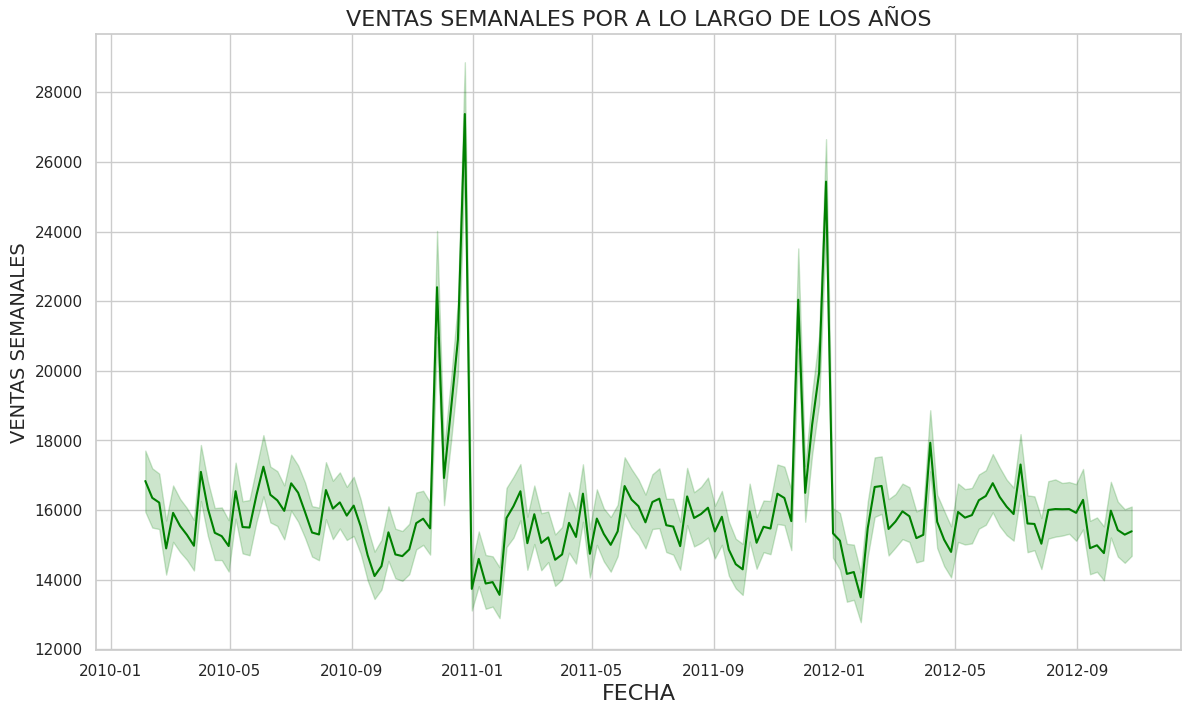

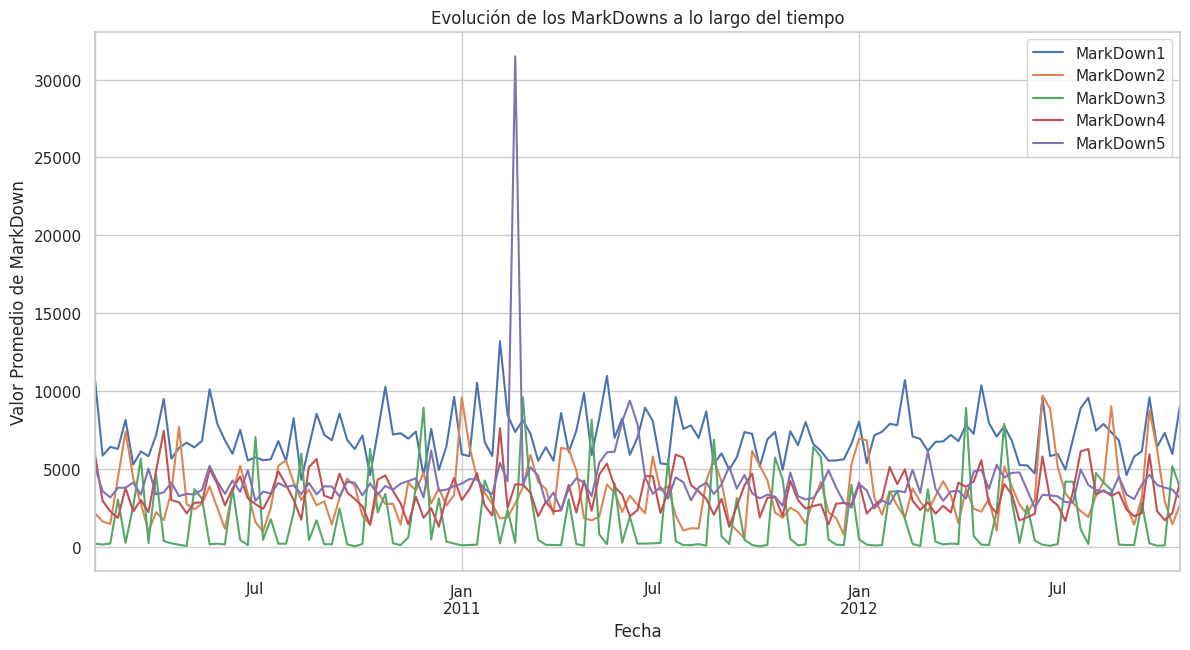

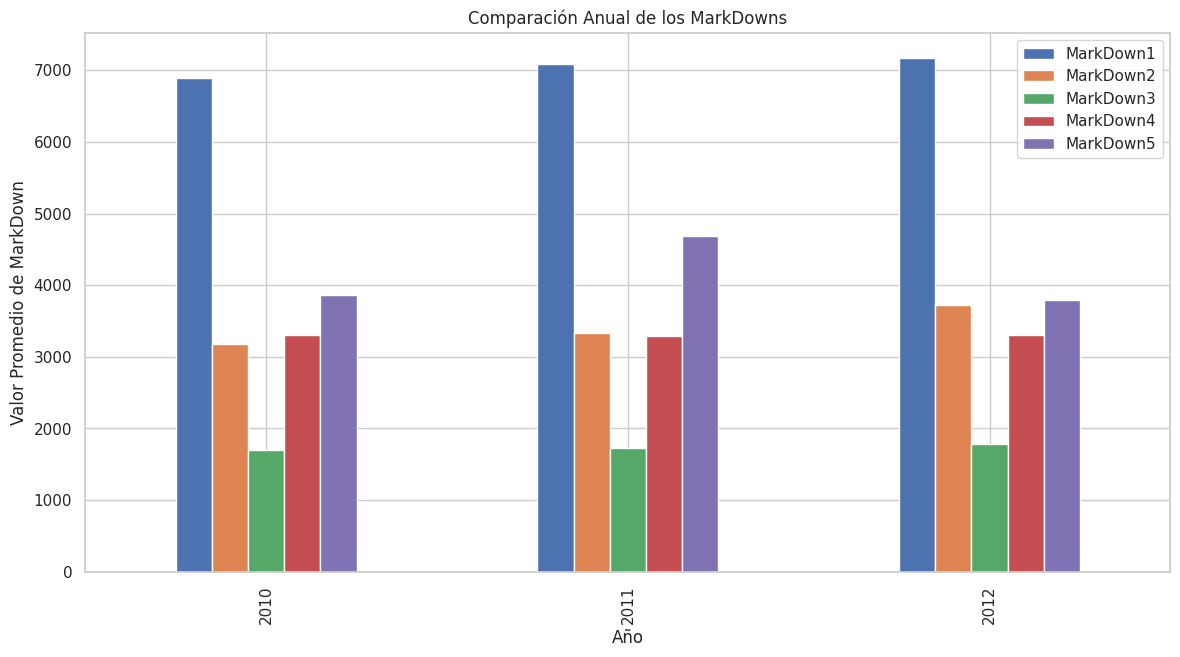

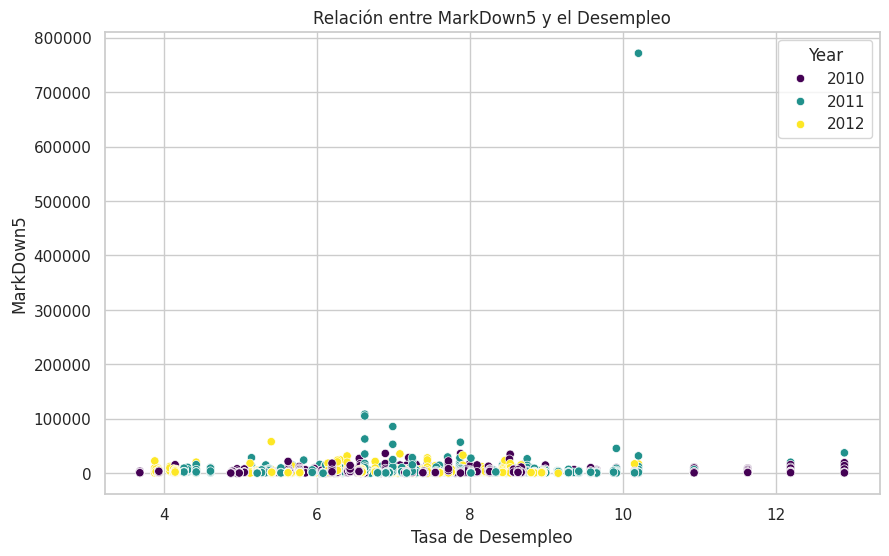

In [ ]:
# Análisis DataFrame "Sales"
# Configuración general de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data = sales, x='Date', y='Weekly_Sales', color='green')

# Añadir títulos y etiquetas
plt.title('VENTAS SEMANALES POR A LO LARGO DE LOS AÑOS', fontsize=16)
plt.xlabel('FECHA',  fontsize=16)
plt.ylabel('VENTAS SEMANALES', fontsize=14)

# Mostrar el gráfico
plt.show()


# Configuración general de los gráficos
sns.set(style="whitegrid")

# Extraer el año para facilitar la comparación anual
features['Year'] = features['Date'].dt.year

# Evolución de los descuentos a lo largo del tiempo
plt.figure(figsize=(14, 7))
features.groupby('Date').mean()[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(ax=plt.gca())
plt.title('Evolución de los MarkDowns a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio de MarkDown')
plt.legend(loc='upper right')
plt.show()

# Comparación de los descuentos entre años
plt.figure(figsize=(14, 7))
features.groupby('Year').mean()[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(kind='bar', ax=plt.gca())
plt.title('Comparación Anual de los MarkDowns')
plt.xlabel('Año')
plt.ylabel('Valor Promedio de MarkDown')
plt.legend(loc='upper right')
plt.show()

# Relación entre MarkDown5 y el desempleo
plt.figure(figsize=(10, 6))
sns.scatterplot(data = features, x='Unemployment', y='MarkDown5', hue='Year', palette='viridis')
plt.title('Relación entre MarkDown5 y el Desempleo')
plt.xlabel('Tasa de Desempleo')
plt.ylabel('MarkDown5')
plt.show()

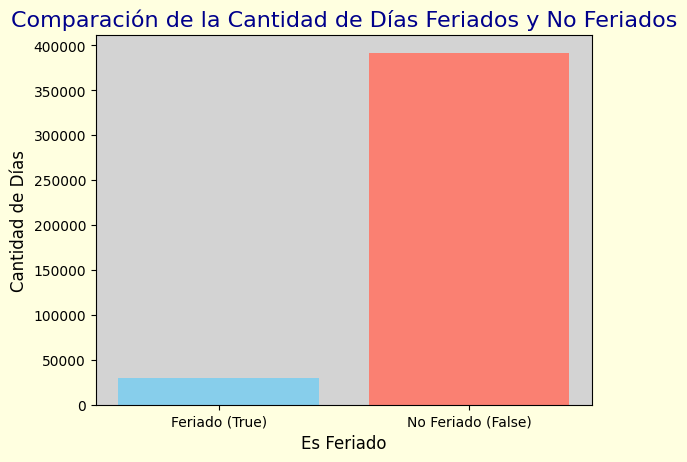

In [ ]:

# Cargar los datasets
df = pd.read_csv("/content/drive/MyDrive/Ciencia De Datos/Modulo 2./salesdata-set.csv")

# Contar la cantidad de días feriados y no feriados
holiday_count = df['IsHoliday'].value_counts()

# Crear un DataFrame con los resultados para graficar
holiday_df = pd.DataFrame({
    'IsHoliday': ['Feriado (True)', 'No Feriado (False)'],
    'Count': [holiday_count[True], holiday_count[False]]
})

# Crear la figura y el eje
fig, ax = plt.subplots()

# Cambiar el color de fondo de la figura y del gráfico
fig.patch.set_facecolor('lightyellow')
ax.set_facecolor('lightgrey')

# Crear la gráfica de barras con colores personalizados
bars = ax.bar(holiday_df['IsHoliday'], holiday_df['Count'], color=['skyblue', 'salmon'])

# Añadir título con color personalizado
ax.set_title('Comparación de la Cantidad de Días Feriados y No Feriados', color='darkblue', fontsize=16)

# Añadir etiquetas de los ejes
ax.set_xlabel('Es Feriado', fontsize=12)
ax.set_ylabel('Cantidad de Días', fontsize=12)

# Mostrar la gráfica
plt.show()

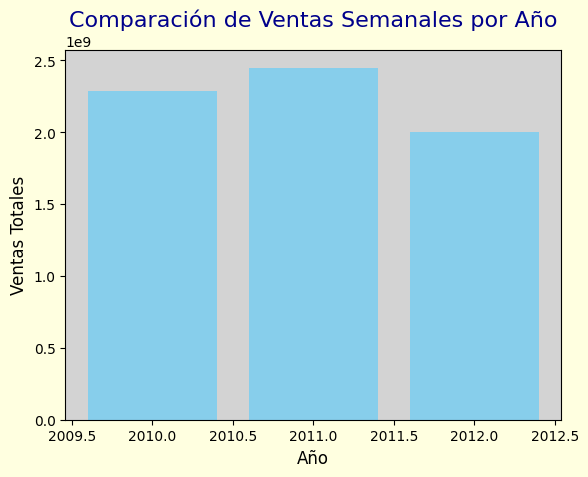

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extraer el año de la columna Date
df['Year'] = df['Date'].dt.year

# Agrupar las ventas semanales por año
sales_by_year = df.groupby('Year')['Weekly_Sales'].sum().reset_index()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Cambiar el color del fondo de la figura y del gráfico
fig.patch.set_facecolor('lightyellow')
ax.set_facecolor('lightgrey')

# Crear la gráfica de barras
bars = ax.bar(sales_by_year['Year'], sales_by_year['Weekly_Sales'], color='skyblue')

# Añadir título
ax.set_title('Comparación de Ventas Semanales por Año', color='darkblue', fontsize=16)

# Añadir etiquetas de los ejes
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Ventas Totales', fontsize=12)

# Mostrar la gráfica
plt.show()

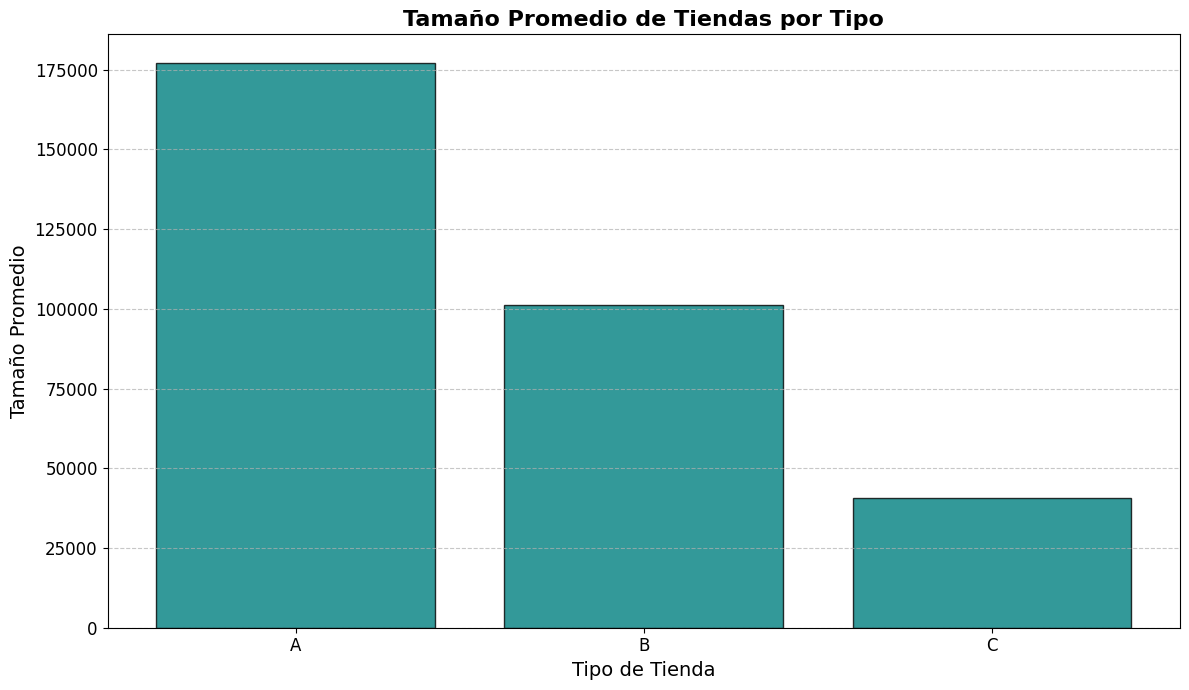

In [ ]:
stores = pd.read_csv("/content/drive/MyDrive/Ciencia De Datos/Modulo 2./Copia de stores data-set.csv")

# Agrupar el tamaño promedio de las tiendas por tipo
size_by_type = stores.groupby('Type')['Size'].mean()

# Crear la gráfica
plt.figure(figsize=(12, 7))
bars = plt.bar(size_by_type.index, size_by_type.values, color='teal', edgecolor='black', alpha=0.8)


plt.xlabel('Tipo de Tienda', fontsize=14)
plt.ylabel('Tamaño Promedio', fontsize=14)
plt.title('Tamaño Promedio de Tiendas por Tipo', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()